In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [6]:
df.shape

(5572, 2)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.columns = ['label', 'text']

In [9]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

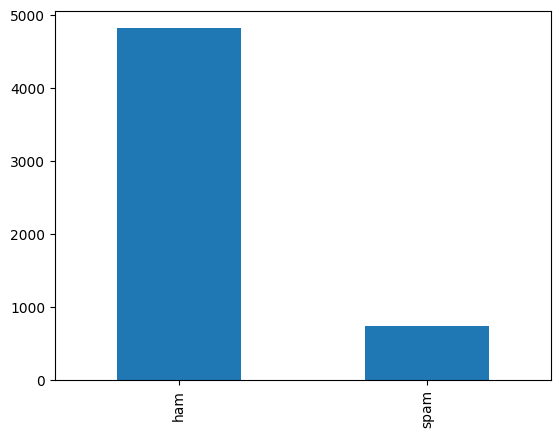

In [10]:
df.label.value_counts().plot.bar()

In [11]:
#Text preprocessing
import nltk
# nltk.download('all')
# create a list text
text = list(df['text'])
# preprocessing loop
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

#assign corpus to data['text']

df['text'] = corpus

df.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\aarora\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\aarora\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\aarora\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\aarora\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\aarora\AppData\Roaming\nltk_data...
[nltk_data] 

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [12]:
X = df["text"]
y = df["label"]
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state=00)

print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (4457,)
Testing Data :  (1115,)


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(4457, 6206)

In [14]:
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

X_test_cv = cv.transform(X_test)
print(X_test_cv.shape)
pred = lr.predict(X_test_cv)
pred

(1115, 6206)


array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [22]:
pred = lr.predict_proba(X_test_cv)

In [26]:
pred = pred[0]

In [29]:
pred = np.expand_dims(pred, axis=0)

In [45]:
int(pred[0][0])

0

In [23]:
import numpy as np

In [35]:
label = ['a', 'b']

In [41]:
int(np.argmax(pred, axis=1)[0])

0

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

mat = pd.DataFrame(confusion_matrix(y_test, pred), index=["ham", "spam"], columns=["ham", "span"])
mat

,ham,span
ham,949,0
spam,25,141


In [16]:
precision = mat["ham"][0] / (mat["ham"][0] + mat["span"][0])
precision

1.0

In [17]:
accuracy_score(y_test, pred)

0.9775784753363229

In [18]:
import pickle 
pickle.dump(lr, open("logisticregression.pkl", "wb"))